# **KLUSTERISASI K-MEANS DENGAN 2, 3, DAN 4 CLUSTER**

In [7]:
%pip install pymysql
%pip install psycopg2

## **Menggabungkan Data PostgreSQL dan MySQL.**

Kode dibawah ini digunakan untuk mengambil dan menggabungkan data dari dua database berbeda, yaitu data dari tabel sepaliris di PostgreSQL diambil menggunakan psycopg2, sedangkan data dari tabel petaliris di MySQL diambil menggunakan pymysql. Keduanya disimpan dalam DataFrame pandas. Setelah itu, data digabung menggunakan pd.merge() berdasarkan kolom id dan class, lalu hasilnya ditampilkan dalam bentuk tabel tanpa indeks.

In [8]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd

def get_pg_data():
    conn = psycopg2.connect(
        host="postgre-mysqliris.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ldSz_mZZNFskZEWcZsJ",
        database="defaultdb",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-37a70601-mysqliris.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_3JRmZQG_Bul1_r-Rhl6",
        database="petal",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa          15.0         20.0          46.0         31.0
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa          16.0         20.0          48.0         34.0
 13     Iris-setosa           1.4     

## **Normalisasi dan Reduksi Dimensi dengan PCA.**

Kode ini digunakan untuk mempersiapkan data agar dapat divisualisasikan dalam 2 dimensi. Pertama, kolom non-numerik seperti **id** dan **class** dihapus dari DataFrame **df_merged**, menyisakan hanya fitur numerik. Kemudian, fitur-fitur numerik dinormalisasi menggunakan **StandardScaler** untuk memastikan semua data berada pada skala yang sama. Setelah itu, dilakukan reduksi dimensi menggunakan **Principal Component Analysis (PCA)** untuk mengubah data menjadi dua komponen utama, sehingga memudahkan visualisasi. Proses ini membantu mengurangi kompleksitas data dengan menggabungkan informasi penting ke dalam dua dimensi.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)


## **Klusterisasi KMeans dengan 2 Cluster dan Visualisasi Hasil PCA.**

Kode ini melakukan klusterisasi KMeans dengan 2 cluster pada data yang telah direduksi dimensinya menggunakan PCA. Hasil klusterisasi dievaluasi dengan inertia dan silhouette score untuk mengukur kualitas cluster. Kemudian, data divisualisasikan dalam scatter plot, dengan warna menunjukkan cluster yang terbentuk, menggunakan dua komponen utama dari PCA untuk sumbu X dan Y.

[2 Clusters] Inertia: 92.38, Silhouette Score: 0.9092


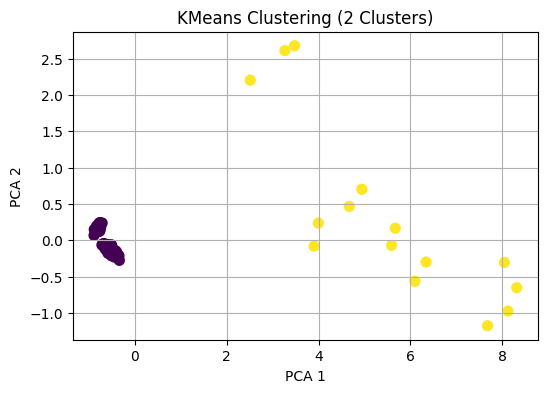

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.2f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


## **Klusterisasi KMeans dengan 3 Cluster dan Visualisasi Hasil PCA.**

Kode ini melakukan klusterisasi KMeans dengan 3 cluster pada data yang sudah direduksi dimensinya dengan PCA. Hasil klusterisasi dinilai menggunakan inertia dan silhouette score untuk mengukur kualitas cluster. Kemudian, data divisualisasikan dalam scatter plot dengan warna yang menunjukkan cluster yang terbentuk, menggunakan dua komponen utama PCA pada sumbu X dan Y.

[3 Clusters] Inertia: 42.29, Silhouette Score: 0.8962


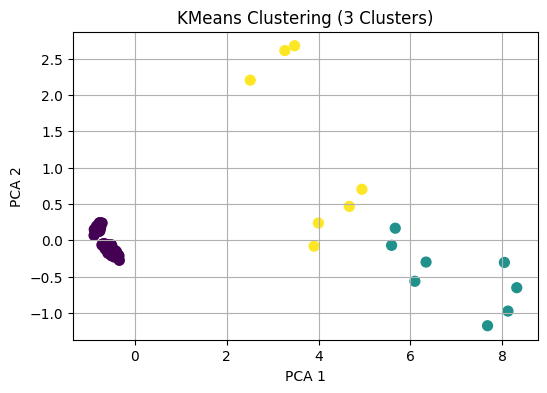

In [11]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.2f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


## **Klusterisasi KMeans dengan 4 Cluster dan Visualisasi Hasil PCA.**

Pada kode ini, dilakukan klusterisasi KMeans dengan jumlah cluster yang ditetapkan sebanyak 4. Data yang telah direduksi dimensinya dengan PCA dikelompokkan ke dalam 4 cluster, kemudian hasil klusterisasi dievaluasi menggunakan inertia dan silhouette score untuk melihat sejauh mana data terkelompok dengan baik. Hasil klusterisasi ini kemudian divisualisasikan dalam scatter plot, di mana setiap titik diberi warna sesuai dengan cluster yang terbentuk. Visualisasi ini membantu untuk memeriksa bagaimana data tersebar dalam 4 cluster berdasarkan dua komponen utama PCA, yang mewakili sumbu X dan Y.

[4 Clusters] Inertia: 26.83, Silhouette Score: 0.8935


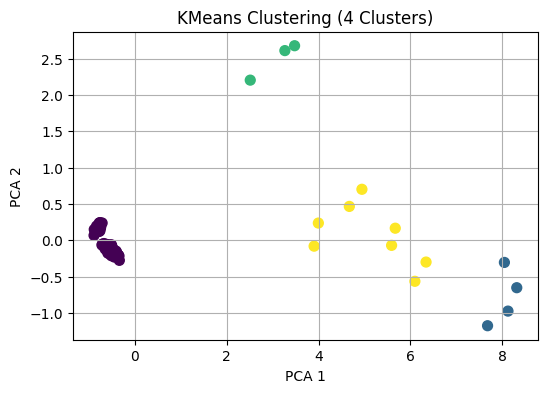

In [12]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.2f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
